### **Problem 1. Clustering with κ-means**


In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib as mpl
import matplotlib.pyplot as plt

#### **1.1**

K-means algorithm 

In [ ]:
#main function
def k_means(dataset,k,epoch):
  #initialization
  data_shape= dataset.shape
  init_trial = 0
  init_distortion = float("inf")
  init_centroids = []
  init_cluster = []
  size_p = data_shape[0]
    
  #Find random initialization that yields the minumun distortion
  #set initial trial = 10
  while init_trial<10:
    ran_index = np.random.randint(size_p,size=k)
    temp_cen = dataset[ran_index,:]
    temp_index = get_targetIndex(temp_cen,dataset)

    #corner case: no point is assigned to an centroid
    help_con = helper_uni(temp_index,k)

    if help_con==True:   
      temp_centroids,temp_clusters = group_points(dataset,temp_index,temp_cen)     
      temp_distor = get_distortion(temp_centroids,temp_clusters,size_p)

      #Find centroids with minimum distortion 
      if temp_distor < init_distortion:
        init_distortion = temp_distor
        init_centroids = temp_cen
        init_cluster = temp_clusters

    init_trial+=1


  #Training Epochs
  centroid_result = init_centroids
  cluster_result = init_cluster
  for i in range(epoch):
    update_index = get_targetIndex(centroid_result,dataset) #update point assignment
    temp_cen_2,temp_cluster_2 = group_points(dataset,update_index,centroid_result) #new centroids and new assignment
    
    #evaluate distortion
    temp_distor_2 = get_distortion(temp_cen_2,temp_cluster_2,size_p) 
    if temp_distor_2 <= init_distortion:
      init_distortion = temp_distor_2
      centroid_result = temp_cen_2
      cluster_result = temp_cluster_2
 
  return centroid_result,cluster_result


In [ ]:
#Find cluster assignment of each centroid, and calculate the new centroids use mean function
def group_points(data,assign_index,cen):
  new_centroids =[]
  cluster_assignment =[]

  for i in range(cen.shape[0]):
    point_group = data[np.where(assign_index==i)]  #cluster assignment #shape = (# of points, 30)
    cluster_assignment.append(point_group)
    new_cen = np.mean(point_group,axis=0) # new centroid 
    new_centroids.append(new_cen)
  
  new_centroids = np.array(new_centroids)
  cluster_assignment = np.array(cluster_assignment)

  return new_centroids,cluster_assignment

In [ ]:
#Find the assigned centroid of each training point
def get_targetIndex(cen,data):
  distances = ((data - cen[:,np.newaxis])**2).sum(axis=2) #squared euclidean distance #shape =(2, 569, 30)
  index = np.argmin(distances, axis=0) #shape = (2, 569)
  return  index

In [ ]:
#Find distortion
def get_distortion(cen,clusters,m):
  temp=[]
 
  for index,cen in enumerate(cen):
    distortion_temp = ((clusters[index] - cen)**2).sum() #squared euclidean distance
    temp.append(distortion_temp)

  result = sum(temp)/m

  return result


In [ ]:
def helper_uni(index_list,k):
  temp = range(k)
  in_u = set(index_list)
  result = True
  for each in temp:
    if (each not in in_u):
      result=False
      break
  
  return result

#### **1.2**

The main function of the k-means algorithm is `k_means(dataset,k,epoch)`. Three variables were passed to the function


*  an array of data
*  value of k
* number of training epoch

The value of k increments by 1





In [ ]:
dataset = load_breast_cancer()
dataset = dataset.data
m=dataset.shape[0]

k=2
upperk = 7
increment = 1
epoch=20
distortions = [] #distortion achieved of each k


In [ ]:
while k <= upperk:
  print('k = ',k)
  result_centroid,result_cluster= k_means(dataset,k,epoch)
  temp_distor = get_distortion(result_centroid,result_cluster,m)
  print('Distortion = ',temp_distor)
  distortions.append(temp_distor) 
  k+=1


k =  2
Distortion =  136982.60084059552
k =  3
Distortion =  88793.00357607732
k =  4
Distortion =  51364.74807026325
k =  5
Distortion =  36350.012788761844
k =  6
Distortion =  31041.12131198628
k =  7
Distortion =  27000.319715203408


#### **1.3**

Plot the distortion achieved by κ-means for values of κ varying between 2
and 7, at increments of 1.

The value of distortion can be found from Problem 1.2

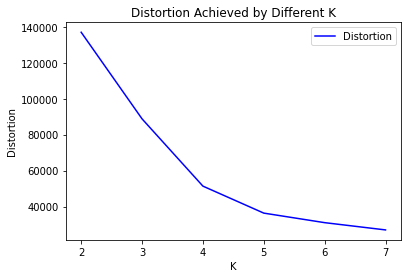

In [ ]:
x = list(range(2,k))

plt.plot(x,distortions,c='blue',label='Distortion')
plt.title('Distortion Achieved by Different K')
plt.xlabel("K")
plt.ylabel("Distortion")
plt.legend(loc='upper right')
plt.show()

#### **1.4** 

**Answer:**

I will pick `k = 4`




